# S&P 500 (+5) Stock Data Clustering

The aim of this notebook is to give an example step by step of how to use  K-means clustering in a real example (i have to admit that this is my first time using K-means, so we are going to learn it together! :))

The dataset that I used is [S&P 500 stock data](https://www.kaggle.com/camnugent/sandp500) , but there are 505 differents Stocks (don't ask me "why?" because I have the same quesiton).

*Objetive:*
Try to segregate groups with similar patters/behaviours and assign them into clusters.The way we are going to define these clusters is by analyzing the variation in the closing value of each stock.

PS: sorry for my english, it's not perfect. 

In [1]:
import os #for interacting with the operating system to import csv's path
import pandas as pd # data processing
import numpy as np # linear algebra
import matplotlib.pyplot as plt # Plotting library

pd.set_option('display.max_columns', 505) # Configuration of the jupyter notebook output (now it's configurated to display all the columns)

On Kaggle, the data is upload on a folder called individual_stocks_5yr that contains files of data for individual stocks, labelled by their stock ticker name.
For this reason I have first to write down all the paths where are this csvs located and then "read" them (pandas function)to upload to a DataFrame. This DataFrame will have a column for each Stock (505) with the close value for each date.

In [2]:
path = '../input/sandp500/individual_stocks_5yr/individual_stocks_5yr'
csvs = [os.path.join(path, file) for file in os.listdir(path) if file.endswith('.csv')]

df = pd.DataFrame() #Creation of a DataFrame where we are going to upload the csvs
    
for file in csvs:
    stock_df = pd.read_csv(file) #Read each csv
    stock_df.index = pd.DatetimeIndex(stock_df.date) #Definition of "Date" as index
    name = stock_df['Name'].iloc[0]
    df[name] = stock_df['close'] #Upload only the close value.

df= df.sort_index(axis=1)
df.describe() #Metrics of our new DataFrame

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,ANSS,ANTM,AON,AOS,APA,APC,APD,APH,APTV,ARE,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,AZO,BA,BAC,BAX,BBT,BBY,BDX,BEN,BF.B,BHF,BHGE,BIIB,BK,BLK,BLL,BMY,BRK.B,BSX,BWA,BXP,C,CA,CAG,CAH,CAT,CB,CBG,CBOE,CBS,CCI,CCL,CDNS,CELG,CERN,CF,CFG,CHD,CHK,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COL,COO,COP,COST,COTY,CPB,CRM,CSCO,CSRA,CSX,CTAS,CTL,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPS,DRE,DRI,DTE,DUK,DVA,DVN,DWDP,DXC,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,EVHC,EW,EXC,EXPD,EXPE,EXR,F,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FL,FLIR,FLR,FLS,FMC,FOX,FOXA,FRT,FTI,FTV,GD,GE,GGP,GILD,GIS,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GT,GWW,HAL,HAS,HBAN,HBI,HCA,HCN,HCP,HD,HES,HIG,HII,HLT,HOG,HOLX,HON,HP,HPE,HPQ,HRB,HRL,HRS,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IFF,ILMN,INCY,INFO,INTC,INTU,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,JBHT,JCI,JEC,JNJ,JNPR,JPM,JWN,K,KEY,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KORS,KR,KSS,KSU,L,LB,LEG,LEN,LH,LKQ,LLL,LLY,LMT,LNC,LNT,LOW,LRCX,LUK,LUV,LYB,M,MA,MAA,MAC,MAR,MAS,MAT,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MLM,MMC,MMM,MNST,MO,MON,MOS,MPC,MRK,MRO,MS,MSFT,MSI,MTB,MTD,MU,MYL,NAVI,NBL,NCLH,NDAQ,NEE,NEM,NFLX,NFX,NI,NKE,NLSN,NOC,NOV,NRG,NSC,NTAP,NTRS,NUE,NVDA,NWL,NWS,NWSA,O,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PCG,PCLN,PDCO,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PX,PXD,PYPL,QCOM,QRVO,RCL,RE,REG,REGN,RF,RHI,RHT,RJF,RL,RMD,ROK,ROP,ROST,RRC,RSG,RTN,SBAC,SBUX,SCG,SCHW,SEE,SHW,SIG,SJM,SLB,SLG,SNA,SNI,SNPS,SO,SPG,SPGI,SRCL,SRE,STI,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYMC,SYY,T,TAP,TDG,TEL,TGT,TIF,TJX,TMK,TMO,TPR,TRIP,TROW,TRV,TSCO,TSN,TSS,TWX,TXN,TXT,UA,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
count,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1063.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.00000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,44.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,143.000000,152.000000,1259.000000,1259.000000,1259.000000,1259.000000,1257.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,850.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1173.000000,1259.000000,1259.000000,1259.000000,561.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1243.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,109.000000,215.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.000000,1259.0

In [3]:
df.info() #More information about our DataFrame

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1259 entries, 2013-02-08 to 2018-02-07
Columns: 505 entries, A to ZTS
dtypes: float64(505)
memory usage: 4.9 MB


In [4]:
df.shape #A bit more information ...

(1259, 505)

In [5]:
df.columns.unique() #Checking that ours columns are unique and we haven't uploaded duplicate csvs/stock names.

Index(['A', 'AAL', 'AAP', 'AAPL', 'ABBV', 'ABC', 'ABT', 'ACN', 'ADBE', 'ADI',
       ...
       'XL', 'XLNX', 'XOM', 'XRAY', 'XRX', 'XYL', 'YUM', 'ZBH', 'ZION', 'ZTS'],
      dtype='object', length=505)

In [6]:
df.isnull().sum().sum() #Amount of missing values (IMPORTANT to check always this!!)

16755

In [7]:
df.columns[df.isnull().any()] #Cjecking which stocks have columns with any missing value

Index(['ALLE', 'APTV', 'BHF', 'BHGE', 'BMY', 'CFG', 'COTY', 'CSRA', 'DHR',
       'DWDP', 'DXC', 'ES', 'EVHC', 'FOX', 'FOXA', 'FTV', 'GOOG', 'HLT', 'HPE',
       'HPQ', 'ICE', 'INFO', 'IQV', 'KHC', 'NAVI', 'NWS', 'NWSA', 'O', 'ORCL',
       'PYPL', 'QRVO', 'SYF', 'UA', 'WLTW', 'WRK'],
      dtype='object')

In [8]:
df['ALLE'] #Example of a Stock with null values (NaN)

2013-02-08      NaN
2013-02-11      NaN
2013-02-12      NaN
2013-02-13      NaN
2013-02-14      NaN
              ...  
2018-02-01    85.17
2018-02-02    81.85
2018-02-05    79.11
2018-02-06    80.11
2018-02-07    79.96
Name: ALLE, Length: 1259, dtype: float64

In [9]:
df=df.fillna(method ='bfill') #To fill the nulls values, we are going to use the next not null value

In [10]:
df['ALLE'] #Checking if this magic filling function worked ... yes! ;)

2013-02-08    48.475
2013-02-11    48.475
2013-02-12    48.475
2013-02-13    48.475
2013-02-14    48.475
               ...  
2018-02-01    85.170
2018-02-02    81.850
2018-02-05    79.110
2018-02-06    80.110
2018-02-07    79.960
Name: ALLE, Length: 1259, dtype: float64

In [11]:
df.isnull().sum().sum() #Checking if also worked for all the 16755 null values ... double yes!!

0

In [12]:
df_month = df.resample('M').last() #Selection of the last value of each month.
df_month.head()

,A,AAL,AAP,AAPL,ABBV,ABC,ABT,ACN,ADBE,ADI,ADM,ADP,ADS,ADSK,AEE,AEP,AES,AET,AFL,AGN,AIG,AIV,AIZ,AJG,AKAM,ALB,ALGN,ALK,ALL,ALLE,ALXN,AMAT,AMD,AME,AMG,AMGN,AMP,AMT,AMZN,ANDV,ANSS,ANTM,AON,AOS,APA,APC,APD,APH,APTV,ARE,ARNC,ATVI,AVB,AVGO,AVY,AWK,AXP,AYI,AZO,BA,BAC,BAX,BBT,BBY,BDX,BEN,BF.B,BHF,BHGE,BIIB,BK,BLK,BLL,BMY,BRK.B,BSX,BWA,BXP,C,CA,CAG,CAH,CAT,CB,CBG,CBOE,CBS,CCI,CCL,CDNS,CELG,CERN,CF,CFG,CHD,CHK,CHRW,CHTR,CI,CINF,CL,CLX,CMA,CMCSA,CME,CMG,CMI,CMS,CNC,CNP,COF,COG,COL,COO,COP,COST,COTY,CPB,CRM,CSCO,CSRA,CSX,CTAS,CTL,CTSH,CTXS,CVS,CVX,CXO,D,DAL,DE,DFS,DG,DGX,DHI,DHR,DIS,DISCA,DISCK,DISH,DLR,DLTR,DOV,DPS,DRE,DRI,DTE,DUK,DVA,DVN,DWDP,DXC,EA,EBAY,ECL,ED,EFX,EIX,EL,EMN,EMR,EOG,EQIX,EQR,EQT,ES,ESRX,ESS,ETFC,ETN,ETR,EVHC,EW,EXC,EXPD,EXPE,EXR,F,FAST,FB,FBHS,FCX,FDX,FE,FFIV,FIS,FISV,FITB,FL,FLIR,FLR,FLS,FMC,FOX,FOXA,FRT,FTI,FTV,GD,GE,GGP,GILD,GIS,GLW,GM,GOOG,GOOGL,GPC,GPN,GPS,GRMN,GS,GT,GWW,HAL,HAS,HBAN,HBI,HCA,HCN,HCP,HD,HES,HIG,HII,HLT,HOG,HOLX,HON,HP,HPE,HPQ,HRB,HRL,HRS,HSIC,HST,HSY,HUM,IBM,ICE,IDXX,IFF,ILMN,INCY,INFO,INTC,INTU,IP,IPG,IQV,IR,IRM,ISRG,IT,ITW,IVZ,JBHT,JCI,JEC,JNJ,JNPR,JPM,JWN,K,KEY,KHC,KIM,KLAC,KMB,KMI,KMX,KO,KORS,KR,KSS,KSU,L,LB,LEG,LEN,LH,LKQ,LLL,LLY,LMT,LNC,LNT,LOW,LRCX,LUK,LUV,LYB,M,MA,MAA,MAC,MAR,MAS,MAT,MCD,MCHP,MCK,MCO,MDLZ,MDT,MET,MGM,MHK,MKC,MLM,MMC,MMM,MNST,MO,MON,MOS,MPC,MRK,MRO,MS,MSFT,MSI,MTB,MTD,MU,MYL,NAVI,NBL,NCLH,NDAQ,NEE,NEM,NFLX,NFX,NI,NKE,NLSN,NOC,NOV,NRG,NSC,NTAP,NTRS,NUE,NVDA,NWL,NWS,NWSA,O,OKE,OMC,ORCL,ORLY,OXY,PAYX,PBCT,PCAR,PCG,PCLN,PDCO,PEG,PEP,PFE,PFG,PG,PGR,PH,PHM,PKG,PKI,PLD,PM,PNC,PNR,PNW,PPG,PPL,PRGO,PRU,PSA,PSX,PVH,PWR,PX,PXD,PYPL,QCOM,QRVO,RCL,RE,REG,REGN,RF,RHI,RHT,RJF,RL,RMD,ROK,ROP,ROST,RRC,RSG,RTN,SBAC,SBUX,SCG,SCHW,SEE,SHW,SIG,SJM,SLB,SLG,SNA,SNI,SNPS,SO,SPG,SPGI,SRCL,SRE,STI,STT,STX,STZ,SWK,SWKS,SYF,SYK,SYMC,SYY,T,TAP,TDG,TEL,TGT,TIF,TJX,TMK,TMO,TPR,TRIP,TROW,TRV,TSCO,TSN,TSS,TWX,TXN,TXT,UA,UAA,UAL,UDR,UHS,ULTA,UNH,UNM,UNP,UPS,URI,USB,UTX,V,VAR,VFC,VIAB,VLO,VMC,VNO,VRSK,VRSN,VRTX,VTR,VZ,WAT,WBA,WDC,WEC,WFC,WHR,WLTW,WM,WMB,WMT,WRK,WU,WY,WYN,WYNN,XEC,XEL,XL,XLNX,XOM,XRAY,XRX,XYL,YUM,ZBH,ZION,ZTS
2013-02-28,41.48,13.43,76.34,63.0571,36.92,47.20,33.79,74.36,39.310,45.22,31.86,61.36,158.69,36.72,33.79,46.79,11.62,47.19,49.95,85.16,38.01,29.62,41.99,38.48,36.96,65.08,31.44,25.775,46.02,48.475,86.74,13.705,2.49,41.83,146.23,91.55,68.63,77.60,264.27,56.24,75.80,62.18,61.09,17.8825,74.27,79.58,86.34,35.430,88.77,71.14,25.56,14.295,124.83,34.22,40.85,39.45,62.15,68.13,380.15,76.90,11.23,67.60,30.36,16.41,88.06,47.0833,32.810,70.0,57.68,166.340,27.14,239.75,22.205,36.97,102.16,7.39,37.205,103.88,41.97,24.51,34.11,46.21,92.37,85.39,24.17,35.92,43.39,69.80,35.77,14.16,51.635,43.730,40.166,23.08,30.980,20.16,57.02,86.39,58.46,45.01,57.215,84.01,34.38,19.8950,59.67,316.79,115.87,26.61,22.51,21.43,51.03,30.985,60.11,106.06,57.95,101.290,17.36,41.16,42.3050,20.855,31.9,22.94,43.900,34.67,38.3850,70.90,51.12,117.15,89.96,56.00,14.27,87.83,38.53,46.34,56.170,22.30,61.60,54.59,73.34,64.500,34.80,66.98,45.185,73.35,43.62,16.16,46.27,66.80,69.25,59.810,54.26,67.18,67.95,17.53,54.71,76.55,59.00,55.12,48.03,64.10,69.73,56.70,62.855,211.55,55.04,63.09,41.51,56.93,148.99,10.71,61.97,62.26,69.91,42.965,30.99,38.85,63.900,37.44,12.61,51.63,27.250,34.55,31.92,105.43,39.48,94.43,37.65,41.120,15.84,34.19,26.33,61.90,53.4999,60.26,28.48,28.35,106.21,51.91,49.54,67.97,23.22,19.14,42.72,46.25,12.61,27.15,558.46,401.0006,71.03,24.105,32.92,34.36,149.76,12.985,226.46,41.51,40.02,7.03,9.910,37.09,64.14,48.88,68.50,66.50,23.61,48.04,58.0,52.63,21.820,70.10,66.26,16.55,12.41,24.86,18.705,48.07,44.610,16.67,83.34,68.26,200.83,30.964,46.060,72.98,50.13,22.23,26.7,20.880,64.468,44.01,12.78,42.11,52.65,34.50,169.9632,49.76,61.50,26.79,69.658,33.5183,48.84,76.11,20.68,48.92,54.22,60.50,9.39,72.96,21.77,54.76,94.28,37.07,38.41,38.72,59.28,14.605,46.10,102.97,43.11,45.52,30.58,37.8333,88.60,21.19,76.27,54.66,88.00,29.54,23.845,38.15,42.30,26.90,11.70,58.62,41.10,51.782,69.44,60.11,39.45,19.26,40.75,95.90,36.47,106.13,48.06,

In [2]:
df_month_random100 = df_month[df_month.columns.to_series().sample(100)] #Selection of 100 random stocks for easier visualization.

NameError: name 'df_month' is not defined

In [14]:
start = df_month_random100.iloc[0] #Selection of the initial value for each stock selected.
returns = (df_month_random100 - start) / start #Calculation of % variation between each date and the initial value.
returns

,TDG,DISCK,AAL,SPGI,HIG,DLR,JEC,SYK,CELG,BEN,HBI,JCI,PCG,IFF,ROST,JNJ,SBUX,ABT,XL,JWN,CMG,M,ADP,APC,L,HON,NFLX,AIG,PVH,AET,VLO,FDX,PSA,CTAS,TAP,CRM,AFL,ETN,SPG,LMT,GS,NI,A,NTAP,CHK,NCLH,STZ,MOS,TMK,CVX,KHC,CLX,AMP,VFC,LNT,SLB,CCL,NWL,NKE,SLG,JNPR,FB,AYI,CXO,SYF,SNI,SCHW,MSFT,HAS,MRO,MON,ZION,AOS,TMO,LB,APTV,HRB,KSU,JBHT,ALB,DUK,WEC,MMC,PM,ORLY,ALXN,EQT,DVN,AMG,CNP,AON,NRG,PGR,PCLN,BAX,MU,WYNN,CMCSA,LUK,DXC
2013-02-28,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2013-03-31,0.074329,0.078140,0.263589,0.118797,0.092757,-0.001045,0.151515,0.021290,0.122398,0.067680,0.149344,-0.000313,0.044325,0.050562,0.045172,0.071213,0.038286,0.045280,0.057961,0.018628,0.028663,0.018005,0.059811,0.098894,0.022269,0.074893,0.006383,0.021310,-0.123430,0.083492,-0.002193,-0.068576,0.007341,0.005239,0.106763,0.056790,0.041441,-0.011619,-0.001888,0.096818,-0.017428,0.059206,0.011813,0.009456,0.012401,-0.042931,0.076854,0.018278,0.064247,0.014255,0.000000,0.053803,0.073146,0.040247,0.052212,-0.038022,-0.041096,0.118252,0.083548,0.055011,-0.103482,-0.061284,0.017907,0.083037,0.000000,0.020460,0.089286,0.028957,0.097951,0.006567,0.045531,0.034783,0.028520,0.036450,-0.018893,0.000000,0.183427,0.077013,0.069224,-0.039336,0.048231,0.038499,0.022348,0.010463,0.006376,0.062255,0.073863,0.039808,0.050195,0.118059,0.006711,0.103750,0.037356,-0.001381,0.074556,0.191045,0.070659,0.055039,0.019703,0.000000
2013-04-30,0.031333,0.099070,0.258377,0.162406,0.189750,0.052852,0.033579,0.026612,0.143314,0.094938,0.265388,0.003437,0.136023,0.057687,0.139138,0.119827,0.109207,0.092631,0.087291,0.043711,0.146469,0.085158,0.097458,0.065092,0.036186,0.049073,0.148821,0.089713,-0.052852,0.217207,-0.115596,-0.108318,0.091198,0.022096,0.167157,-0.028247,0.089890,-0.009037,0.120924,0.126023,-0.024639,0.109386,-0.000964,0.031028,-0.030754,0.000968,0.115506,0.052101,0.104645,0.041485,0.000000,0.026663,0.085968,0.105172,0.122038,-0.043931,-0.035225,0.128535,0.167830,0.111247,-0.199710,0.019046,0.070894,-0.042574,0.000000,0.055987,0.044335,0.190647,0.183658,-0.024776,0.057310,0.019462,0.054523,0.093225,0.107425,0.000000,0.115849,0.059241,0.020270,-0.058851,0.085921,0.088136,0.023425,0.041853,0.054328,0.129813,0.190680,0.014744,0.064624,0.151657,-0.012113,0.161250,0.038177,0.009978,0.033580,0.124776,0.174508,0.037949,0.148327,0.000000
2013-05-31,0.026416,0.084806,0.308265,0.171858,0.297332,-0.090624,0.167281,0.039292,0.197347,0.096000,0.257820,0.056232,0.053236,0.100164,0.108931,0.106031,0.151139,0.085232,0.097416,0.084840,0.139556,0.176156,0.119948,0.099146,0.062862,0.119258,0.202948,0.169692,-0.054657,0.279508,-0.108796,-0.086218,0.003902,0.039977,0.117620,0.000591,0.114915,0.066000,0.047715,0.202614,0.082265,0.037184,0.095709,0.109043,0.083333,-0.007424,0.198237,0.038948,0.148070,0.047802,0.000000,-0.011070,0.187819,0.140148,0.032921,-0.061914,-0.074644,0.158526,0.132207,0.065670,-0.142650,-0.106495,0.101864,-0.070031,0.000000,0.068358,0.222906,0.255396,0.111444,0.026567,-0.003860,0.162319,0.096044,0.196477,0.098638,0.000000,0.177393,0.075070,0.057452,0.028273,-0.033502,-0.011864,0.077544,-0.009155,0.069358,0.124971,0.266128,0.047733,0.121521

In [15]:
returns = returns.iloc[1:,:] #Elimination of the first row, since the variation between the initial value ant itself is always 0.

In [1]:
def plot_stock(name, returns=returns): #Definition of a function function to plot the monthly variation of the stocks.
    returns[name].plot(label=name, alpha=0.9);

NameError: name 'returns' is not defined

Text(0.5, 1.0, 'Random 5 Stock Variaton')

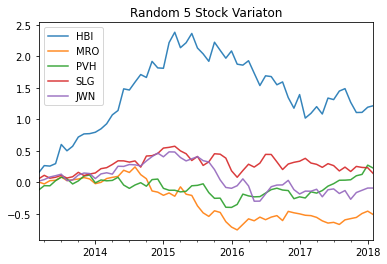

In [17]:
returns_sample = returns[returns.columns.to_series().sample(5)] #Random selection of 5 stocks
returns_sample_name = returns_sample.columns #Array with the name of the Stocks that were random selected

n=0
while n < 5: 
    plot_stock(returns_sample_name[n])
    n=n+1

plt.legend()
plt.title('Random 5 Stock Variaton')

For the election of the number of clusters I based my decision on the Elbow Method. The idea of this method is to run k-means clustering on the dataset for a range of values of k (I applied from 1 to 20 ), and for each value of k calculate the sum of squared distances.
If the line chart when it is visualize looks like an arm, then the "elbow" on the arm is the value of k that is the best.

In [18]:
from sklearn.cluster import KMeans # KMeans clustering library

Sum_of_squared_distances = []
K = range(1,20)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(returns.T) #Don't forget to "Transpose" the DataFrame!!
    Sum_of_squared_distances.append(km.inertia_)

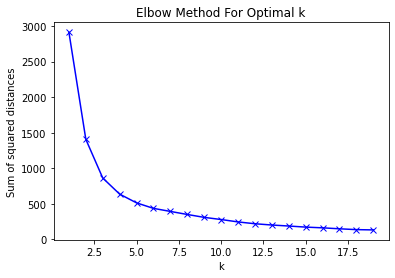

In [19]:
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum of squared distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [20]:
#The optimal "K" that is on the "Elbow" of the plot is 4. The 4 will be our clusters!
kmeans = KMeans(n_clusters=4, random_state=50).fit(returns.T);

In [21]:
#The Magic of K-means has been done, now we have to visualize the differents clusters.
clusters = {}
for l in np.unique(kmeans.labels_):
    clusters[l] = []

for i,l in enumerate(kmeans.predict(returns.T)):
    clusters[l].append(returns.columns[i])
for c in sorted(clusters):
    print('Cluster ' + str(c) + ': ', end='')
    for symbol in clusters[c]:
        print(symbol, end=' , ')
    print()
    print()

Cluster 0: DISCK , DLR , JEC , BEN , JCI , PCG , ABT , XL , JWN , M , APC , L , PVH , VLO , PSA , AFL , ETN , SPG , GS , NI , A , NTAP , CHK , MOS , CVX , KHC , SLB , SLG , JNPR , CXO , SYF , SNI , MRO , MON , APTV , HRB , KSU , JBHT , ALB , DUK , WEC , PM , EQT , DVN , AMG , CNP , NRG , BAX , WYNN , LUK , DXC , 

Cluster 1: AAL , SPGI , HBI , AET , CTAS , LMT , STZ , AYI , AOS , MU , 

Cluster 2: NFLX , FB , 

Cluster 3: TDG , HIG , SYK , CELG , IFF , ROST , JNJ , SBUX , CMG , ADP , HON , AIG , FDX , TAP , CRM , NCLH , TMK , CLX , AMP , VFC , LNT , CCL , NWL , NKE , SCHW , MSFT , HAS , ZION , TMO , LB , MMC , ORLY , ALXN , AON , PGR , PCLN , CMCSA , 



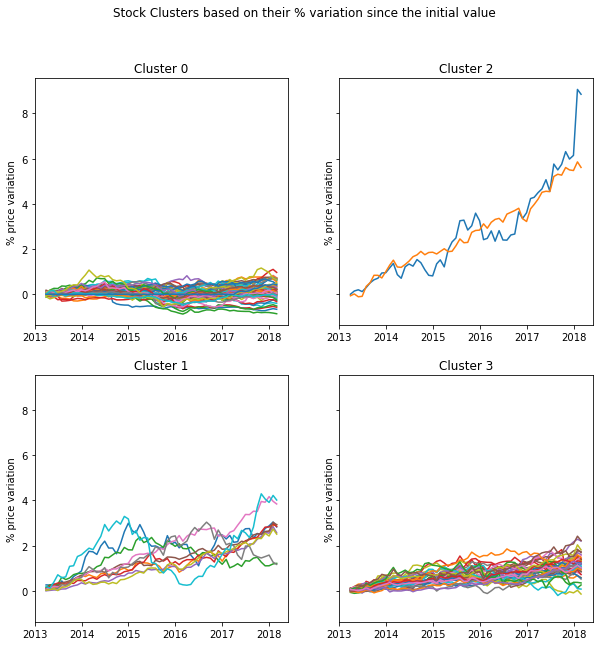

In [22]:
fig, axs = plt.subplots(2, 2,  sharey=True, figsize=(10, 10))
fig.suptitle('Stock Clusters based on their % variation since the initial value')
#plt.ylabel('Stock Price Variation')
axs[0, 0].plot(returns[clusters[0]])
axs[0, 0].set_title('Cluster 0')
axs[1, 0].plot(returns[clusters[1]])
axs[1, 0].set_title('Cluster 1')
axs[0, 1].plot(returns[clusters[2]])
axs[0, 1].set_title('Cluster 2')
axs[1, 1].plot(returns[clusters[3]])
axs[1, 1].set_title('Cluster 3')

for ax in axs.flat:
    ax.set(ylabel='% price variation')

plt.show()

## Conclusion

It wasn't so easy as I thought, but we did it! We ended with 4 clusters that in the above plot (4 subplots) we can see the differents patterns of the stock in each one.

So if you are an investor, you may be interested on applying this to understand the market stock behaviour and try to diversify your money ... As one of my professor always said "DON’T PUT ALL YOUR EGGS IN ONE BASKET!" (if you win you can win a lot, but if you lose ... better not know! haha)